# Rede neural: Detecção de faces
e animais com YOLOv3

In [1]:
import numpy as np
import cv2  # Importa a biblioteca OpenCV para manipulação de imagens e visão computacional
import imutils  # Importa a biblioteca Imutils, que fornece funções convenientes para manipulação de imagens
from google.colab.patches import cv2_imshow  # Importa uma função para exibir imagens no Google Colab
from IPython.display import display, Javascript  # Importa funções para exibir JavaScript no notebook
from google.colab.output import eval_js  # Importa uma função para executar JavaScript e obter o resultado
from base64 import b64decode  # Importa uma função para decodificar dados de base64 para binário
import random #cores diferentes para caixas delimitadoras e do texto.


Função para capturar uma foto usando a webcam em um ambiente do Google Colab.


In [2]:
def take_photo(filename='photo.jpg', quality=0.8):
    """Captura uma foto usando a webcam e salva no arquivo especificado."""
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    print(f'Foto salva como {filename}')
    return filename


    for filename, url in urls.items():
        if not os.path.exists(filename):
            print(f'Download do arquivo {filename}...')
            os.system(f'wget -N {url}')
        else:
            print(f'Arquivo {filename} já existe.')





# Download da Biblioteca Yolov3

In [4]:
def download_yolo_models():
    """Faz o download dos arquivos necessários para o modelo YOLO."""
    urls = {
        'yolov3.cfg': 'https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg',
        'yolov3.weights': 'https://pjreddie.com/media/files/yolov3.weights',
        'coco.names': 'https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names'
    }



# Clique em 'Capturar' para fazer a foto usando sua webcam.

In [57]:
image_file = take_photo()  # Chama a função para capturar uma foto e obter o nome do arquivo

<IPython.core.display.Javascript object>

Foto salva como photo.jpg


# Redimensiona e carrega a imagem

400 300


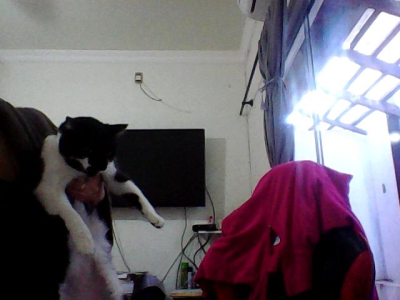

In [58]:
image = cv2.imread(image_file)

# redimensiona para ter uma largura máxima de 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)


# Carrega o modelo YOLO

In [59]:
prototxt = 'yolov3.cfg'
model = 'yolov3.weights'
net = cv2.dnn.readNetFromDarknet(prototxt, model)

# Redimensiona para ter uma largura máxima de 400 pixels

**image = imutils.resize(image, width=400)**
Esta linha redimensiona a imagem para ter uma largura de 400 pixels, mantendo a proporção original da imagem.

**imutils.resize** é uma função que redimensiona a imagem de maneira conveniente, mantendo a proporção original e ajustando a altura automaticamente com base na nova largura especificada.

In [60]:
image = imutils.resize(image, width=400)

# Preparação da imagem

In [61]:
# Lê e prepara a imagem para a inferência
image = imutils.resize(cv2.imread('photo.jpg'), width=400)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Obtém os nomes das camadas de saída
layer_names = net.getLayerNames()
output_layer_indices = net.getUnconnectedOutLayers()
output_layer_names = [layer_names[i - 1] for i in output_layer_indices]  # Subtrai 1 porque OpenCV usa índices baseados em 1
outputs = net.forward(output_layer_names)

# Carrega os nomes das classes
classes = []
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Definir cores específicas para algumas classes
colors = {
    "person": (255, 0, 0),  # Azul para pessoa
    "cat": (0, 0, 255),     # Vermelho para gato
}

# Cor para outras classes
default_color = (0, 255, 0)  # Verde para outras classes

# Carrega os nomes das classes
classes = []
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Itera sobre cada detecção
for out in outputs:
    for detection in out:
        print(detection)  # Imprime o conteúdo de 'detection' para diagnóstico
        if len(detection) >= 5:  # Verifica se 'detection' tem ao menos 5 elementos
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:
                center_x = int(detection[0] * w)
                center_y = int(detection[1] * h)
                box_w = int(detection[2] * w)
                box_h = int(detection[3] * h)
                x = int(center_x - box_w / 2)
                y = int(center_y - box_h / 2)

                color = (0, 255, 0)  # Verde para caixas delimitadoras
                cv2.rectangle(image, (x, y), (x + box_w, y + box_h), color, 1)

                text = "{}: {:.2f}%".format(classes[class_id], confidence * 100)
                y_text = y - 10 if y - 10 > 10 else y + 10
                cv2.putText(image, text, (x, y_text), cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 1)


A saída de streaming foi truncada nas últimas 5000 linhas.
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[1.4733148e-01 9.7234088e-01 2.0418299e-02 3.7784595e-02 3.2851754e-06
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.

# Mostra o que foi detectado na imagem

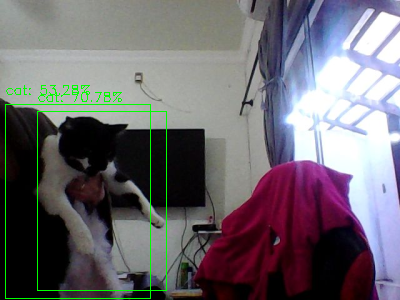

In [62]:
# Exibe a imagem com as detecções
cv2_imshow(image)